<a href="https://colab.research.google.com/github/PavanPratapagiri/topic_modeling/blob/main/assignment/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
df = pd.read_csv('/content/nytimes_news_articles.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Preprocess the data
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
p_stemmer = PorterStemmer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def preprocess(text):
  tokens = tokenizer.tokenize(text.lower())
  tokens = [token for token in tokens if token not in en_stop]
  stemmed_tokens = [p_stemmer.stem(token) for token in tokens]
  return stemmed_tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['content'] = df['content'].astype(str)
df['processed_text'] = pd.Series(df['content'].values).apply(preprocess)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['processed_text']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       [washington, stellar, pitch, kept, met, afloat...
1       [mayor, bill, de, blasio, counsel, chief, lega...
2       [earli, morn, hour, labor, day, last, year, gr...
3       [appl, store, new, york, citi, thing, appl, st...
4       [omaha, unit, state, olymp, swim, trial, spect...
                              ...                        
8882    [new, york, citi, offic, shot, kill, 32, year,...
8883    [second, critic, contest, america, 2016, elect...
8884    [april, 1, polic, offic, 108th, precinct, call...
8885    [khilad, india, cattl, camp, dusti, back, road...
8886    [director, j, j, abram, drop, possibl, hint, f...
Name: processed_text, Length: 8887, dtype: object

In [ ]:
# Create the dictionary
dictionary = corpora.Dictionary(df['processed_text'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create the corpus
corpus = [dictionary.doc2bow(text) for text in df['processed_text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
len(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8887

In [ ]:
# Train the LDA model
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=30, passes=20, iterations=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['news_category'][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'sports-baseball'

In [ ]:
# Print the topics
for idx, topic in lda_model.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(df['news_category'][idx], topic))

Topic: sports-baseball 
Words: 0.015*"said" + 0.014*"6" + 0.012*"year" + 0.012*"open" + 0.011*"show" + 0.010*"network" + 0.010*"french" + 0.010*"play" + 0.010*"season" + 0.009*"netflix"
Topic: nyregion 
Words: 0.027*"game" + 0.019*"point" + 0.013*"said" + 0.011*"curri" + 0.011*"warrior" + 0.010*"3" + 0.010*"team" + 0.009*"b" + 0.009*"first" + 0.008*"play"
Topic: nyregion 
Words: 0.071*"north" + 0.067*"ali" + 0.048*"korea" + 0.043*"south" + 0.033*"korean" + 0.018*"muhammad" + 0.015*"davi" + 0.014*"rugbi" + 0.013*"jackson" + 0.012*"fight"
Topic: nyregion 
Words: 0.014*"said" + 0.011*"art" + 0.009*"build" + 0.009*"new" + 0.009*"design" + 0.009*"mr" + 0.008*"hous" + 0.007*"street" + 0.007*"museum" + 0.007*"work"
Topic: sports-olympics 
Words: 0.026*"game" + 0.016*"season" + 0.013*"first" + 0.012*"two" + 0.012*"said" + 0.012*"team" + 0.011*"play" + 0.010*"second" + 0.009*"score" + 0.008*"1"
Topic: sports-olympics 
Words: 0.063*"percent" + 0.037*"1" + 0.024*"2" + 0.016*"4" + 0.016*"oil" + 0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA Evaluation

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=df['processed_text'],
                                     dictionary=dictionary,
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.527704454156736


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


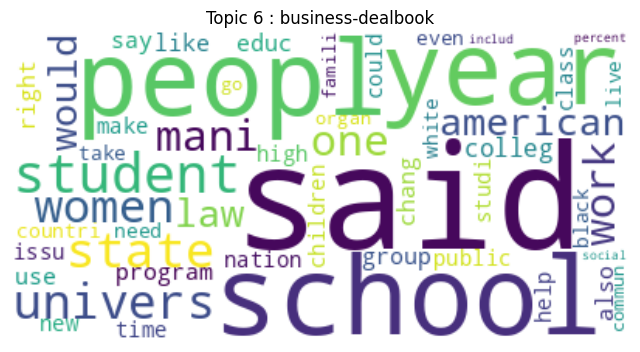

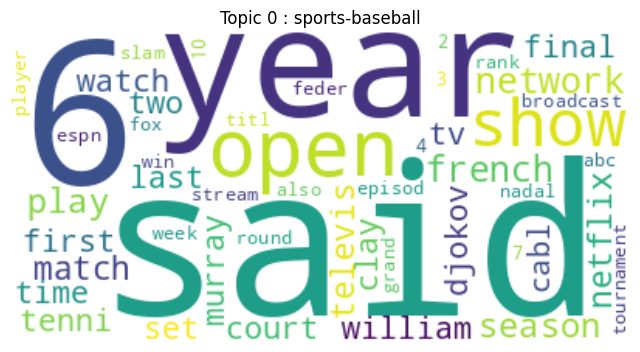

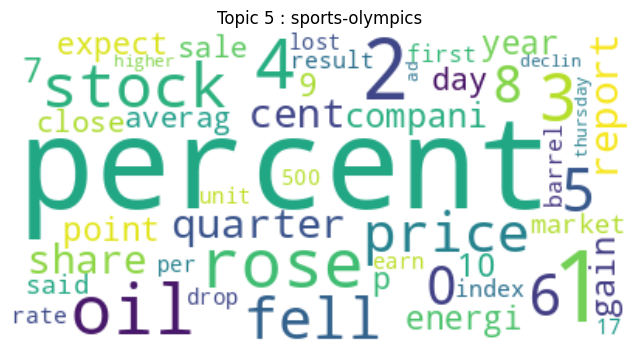

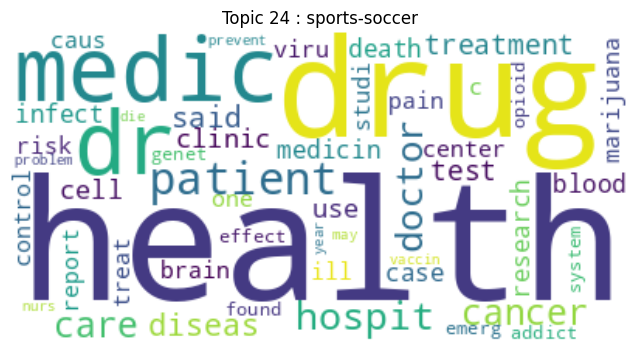

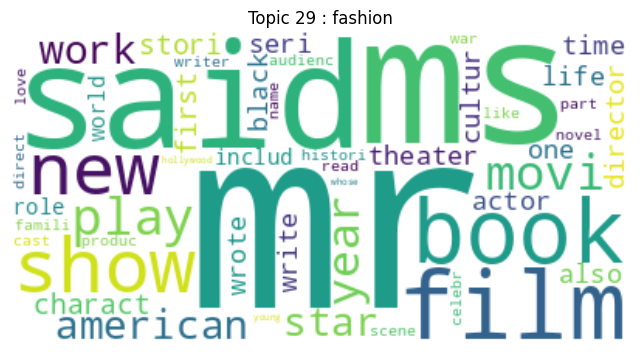

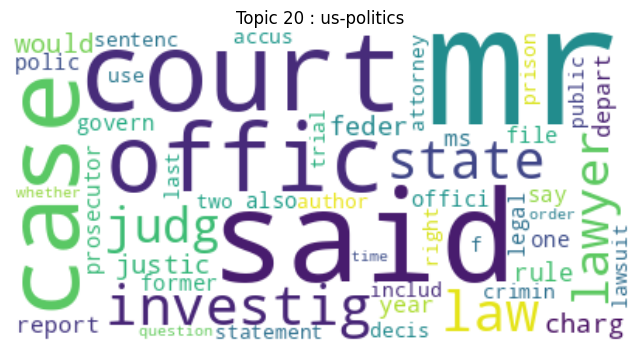

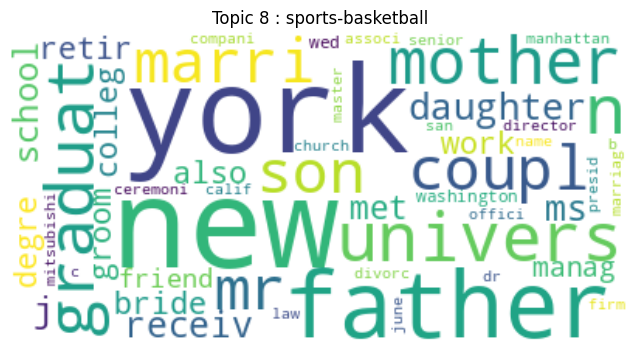

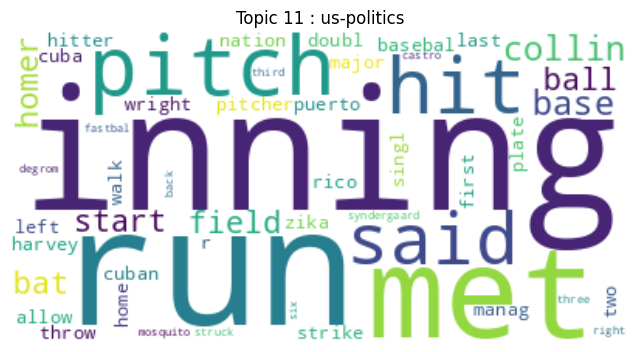

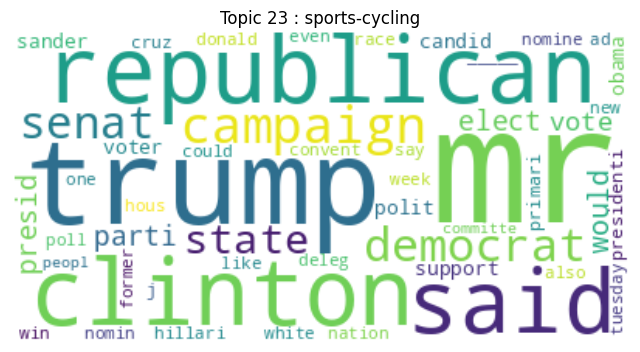

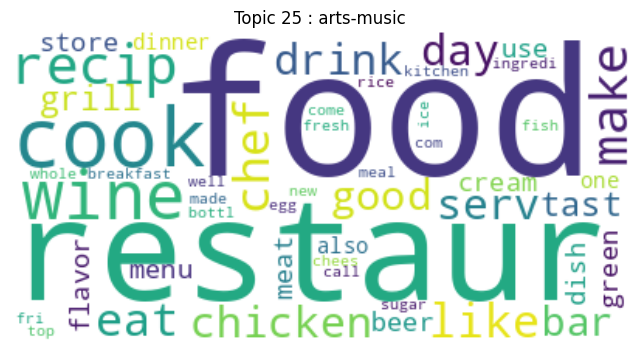

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already trained the LDA model and have access to lda_model

# Get the top words for each topic
topics = lda_model.show_topics(formatted=False, num_words=50)  # You can adjust num_words as needed
# Generate word cloud for each topic
for topic_id, topic in topics:
    word_freq = {word: freq for word, freq in topic}
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)

    # Plot word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id} : { df["news_category"][topic_id] }')
    plt.axis('off')
    plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


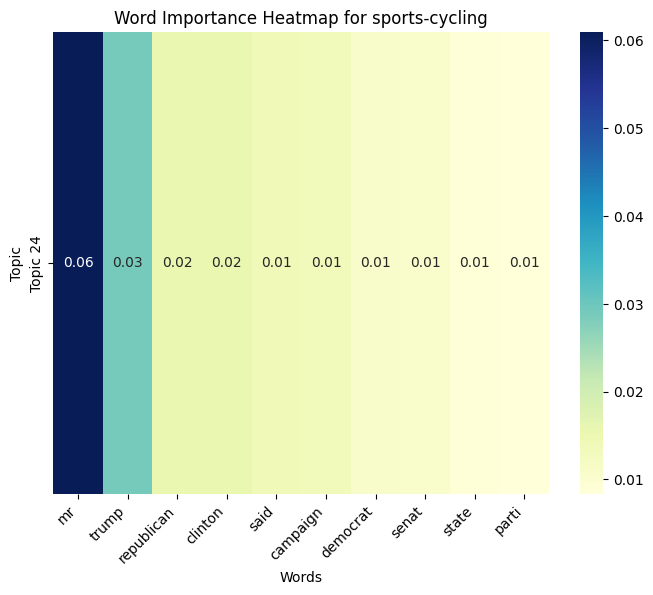

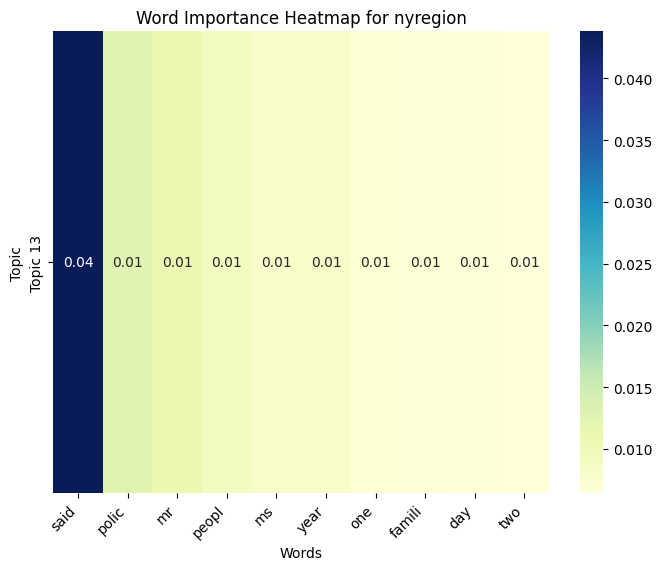

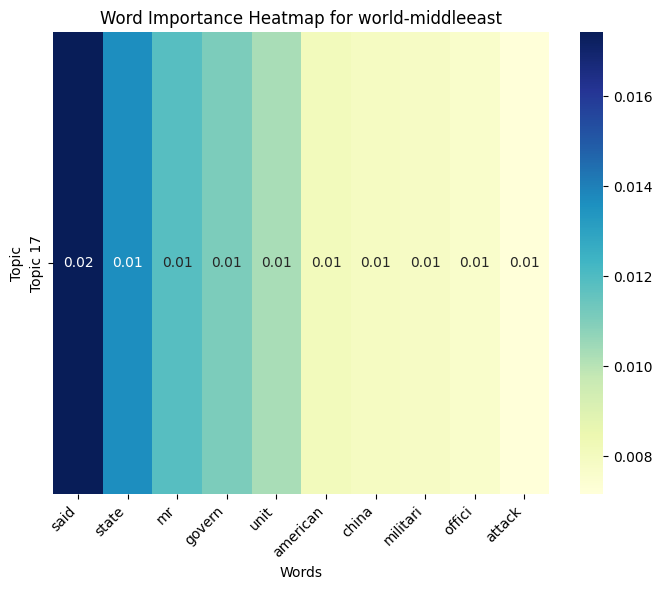

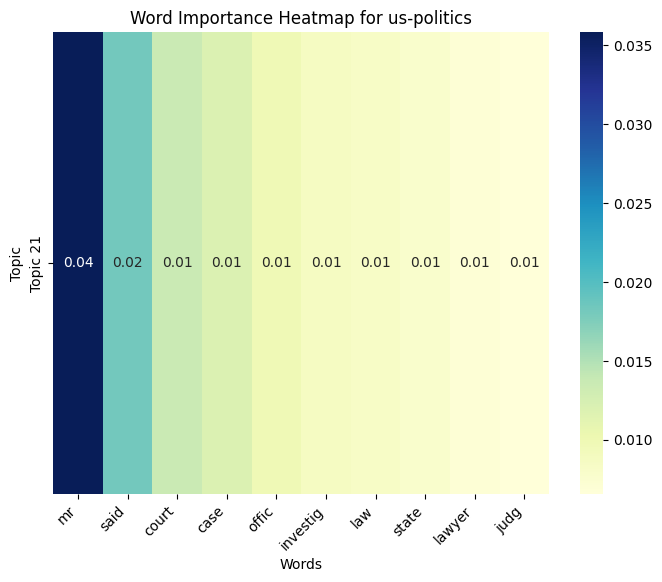

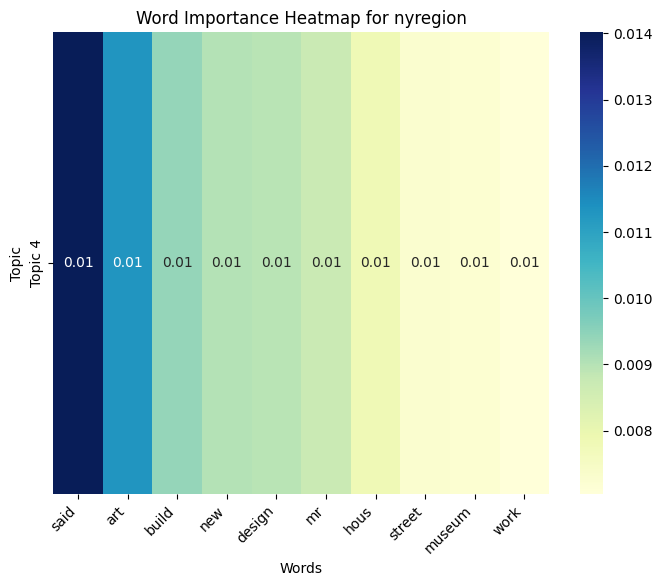

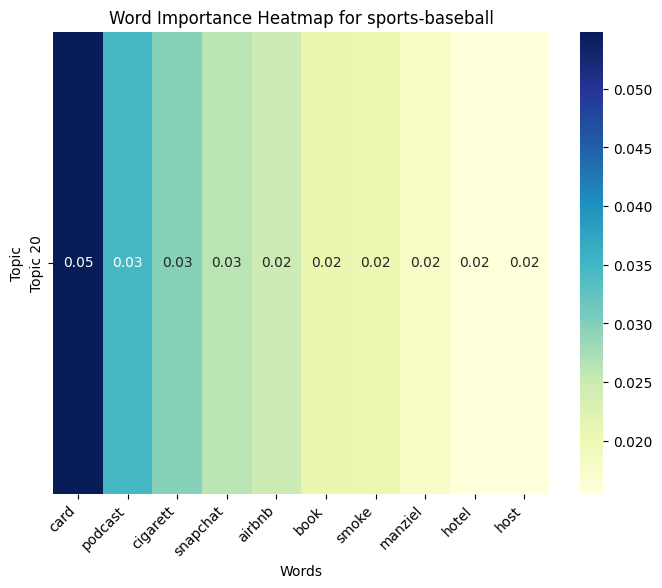

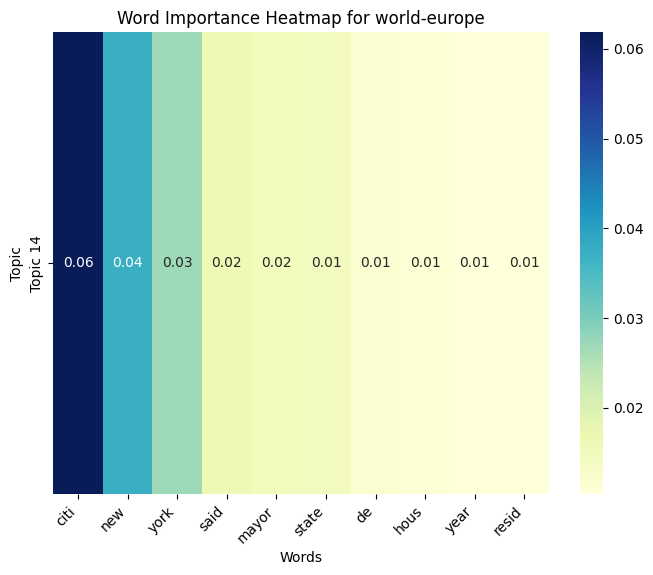

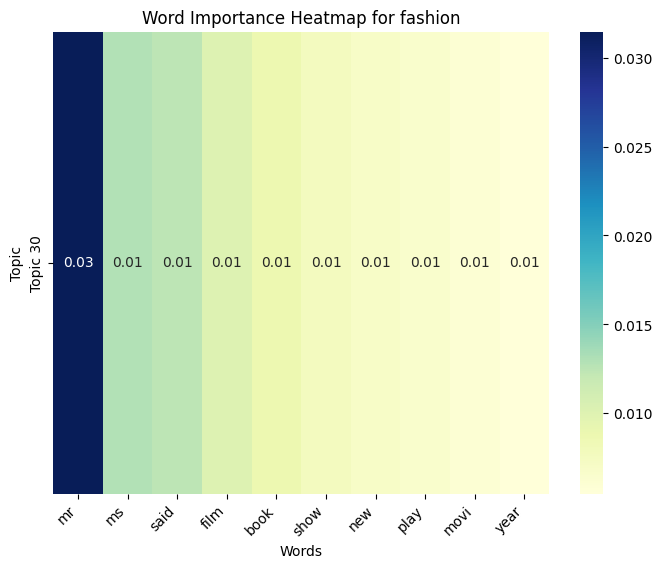

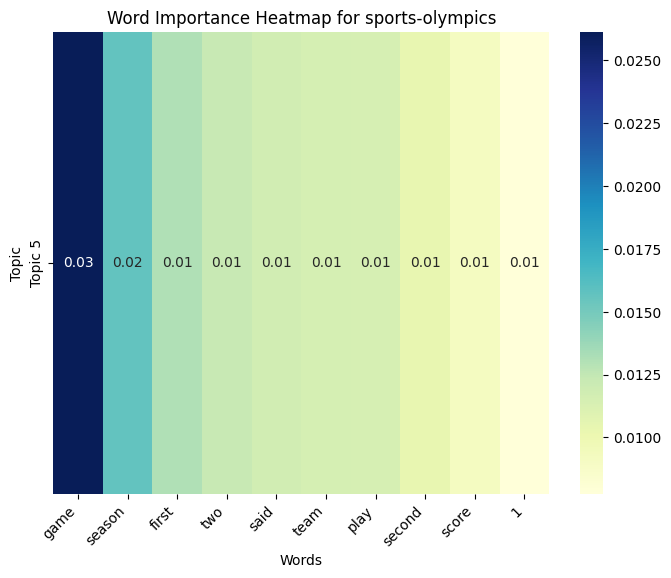

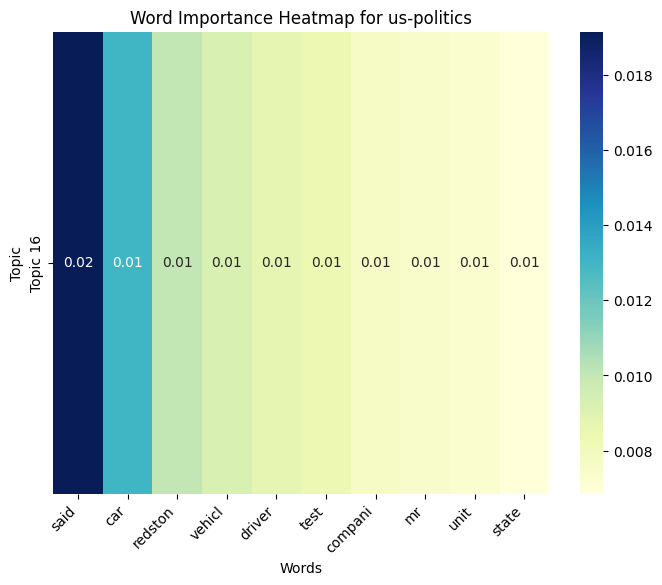

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_word_importance_heatmap(lda_model, num_words=10):
    # Get the top words for each topic along with their importance scores
    topics_words = lda_model.show_topics(formatted=False, num_words=num_words)

    # Extract words and importance scores for each topic
    topic_words = [(topic_id, [(word, score) for word, score in words]) for topic_id, words in topics_words]

    # Plot heatmap for each topic
    for topic_id, words in topic_words:
        words, scores = zip(*words)

        # Create a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap([scores], cmap="YlGnBu", annot=True, fmt=".2f", xticklabels=words, yticklabels=[f"Topic {topic_id + 1}"])
        plt.title(f"Word Importance Heatmap for { df['news_category'][topic_id] }")
        plt.xlabel("Words")
        plt.ylabel("Topic")
        plt.xticks(rotation=45, ha='right')
        plt.show()

# Assuming lda_model is your trained LDA model
plot_word_importance_heatmap(lda_model)
